In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import metrics

In [ ]:
# Round 1 Regression

In [32]:
def to_categorical(x):
    if str(x) == '0' or str(x) == '0.0':
        return 0
    else:
        return 1

In [52]:
data = pd.read_csv('berdo-better.csv')
data['Energy Star Certified'] = pd.to_numeric(data['Energy Star Certified'].apply(to_categorical))
print(data['Energy Star Certified'])
data[['% Electricity', '% Gas', '% Steam', '% Fuel Oil', '% District Hot Water', '% District Chilled Water', '% Other (Diesel #2, Kerosene, Propane or Other Fuel)']] = data[['% Electricity', '% Gas', '% Steam', '% Fuel Oil', '% District Hot Water', '% District Chilled Water', '% Other (Diesel #2, Kerosene, Propane or Other Fuel)']].fillna(0)

# Drop unnecessary data
data = data.drop(['User Submitted Info', 'User Submitted Link', 'Years Reported', 'Address', 'Property Name', 'Reported', 'Property Type', 'Tax Parcel', 'ZIP', 'Property Uses', '% Fuel Oil', '% District Hot Water', '% District Chilled Water', '% Other (Diesel #2, Kerosene, Propane or Other Fuel)'], axis=1).dropna()
print(data.shape)
# Convert Object dtypes to categorical

# Split the data into features (X) and target variable (y)
X = data.drop('Site EUI (kBTU/sf)', axis=1)
y = data['Site EUI (kBTU/sf)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0        0
1        0
2        0
3        0
4        0
        ..
18220    0
18221    0
18222    0
18223    0
18224    0
Name: Energy Star Certified, Length: 18225, dtype: int64
(10511, 14)


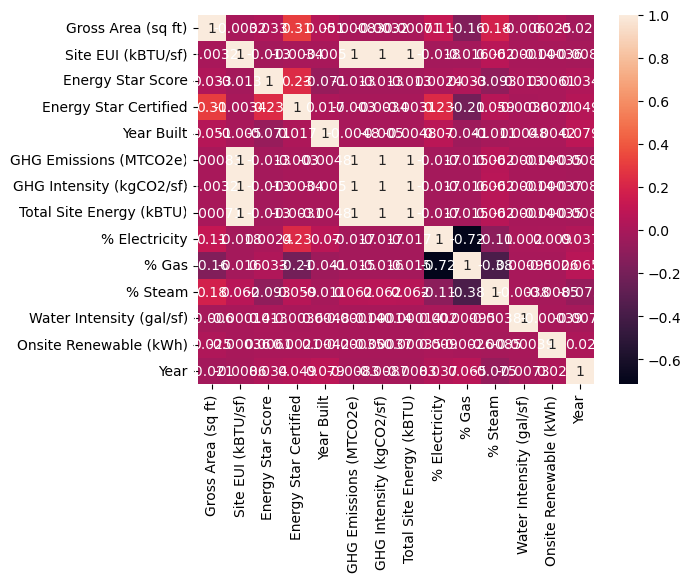

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("Linear Regression MSE:", linear_reg_mse)

Linear Regression MSE: 0.04948363816381609


In [46]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)
report = metrics.classification_report(y_test, logreg_predictions)
print("Classification Report:")
print(report)

Logistic Regression Accuracy: 0.9381818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       260
           1       0.38      0.20      0.26        15

    accuracy                           0.94       275
   macro avg       0.67      0.59      0.61       275
weighted avg       0.92      0.94      0.93       275



Confusion Matrix:
[[255   5]
 [ 12   3]]


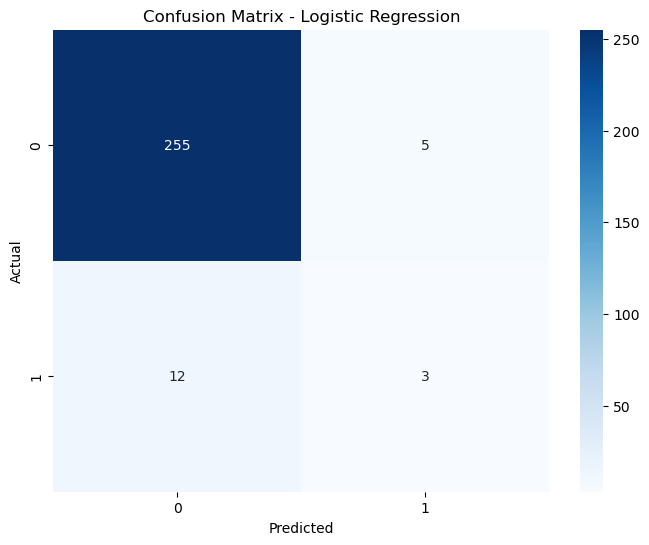

In [45]:
# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, logreg_predictions)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [37]:
# k-NN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
print("k-NN Regression MSE:", knn_mse)

k-NN Regression MSE: 0.05410909090909092


In [47]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_predictions = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
print("Random Forest Regression MSE:", rf_reg_mse)

Random Forest Regression MSE: 0.02154618181818182
